In [1]:
%cd ../

/home/eli/AnacondaProjects/HTFATorch


In [2]:
import logging
import numpy as np
import htfa_torch.dtfa as DTFA
import htfa_torch.niidb as niidb
import htfa_torch.utils as utils

In [3]:
%matplotlib inline

In [4]:
logging.basicConfig(format='%(asctime)s %(message)s', datefmt='%m/%d/%Y %H:%M:%S',
                    level=logging.INFO)

In [5]:
haxby_db = niidb.FMriActivationsDb('data/haxby_mc_zrest.db')

In [6]:
dtfa = DTFA.DeepTFA([b for b in haxby_db.all() if 'rest' not in b.task], mask='/home/eli/Documents/Haxby_Final/mask/haxby_mask.nii.gz', num_factors=100, embedding_dim=2)

05/31/2020 22:55:38 Loading Nifti image /home/eli/Documents/Haxby_Final/sub1_run01_mc_MNI_masked.nii.gz with mask /home/eli/Documents/Haxby_Final/mask/haxby_mask.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
05/31/2020 22:55:39 Loading Nifti image /home/eli/Documents/Haxby_Final/sub1_run02_mc_MNI_masked.nii.gz with mask /home/eli/Documents/Haxby_Final/mask/haxby_mask.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
05/31/2020 22:55:40 Loading Nifti image /home/eli/Documents/Haxby_Final/sub1_run03_mc_MNI_masked.nii.gz with mask /home/eli/Documents/Haxby_Final/mask/haxby_mask.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
05/31/2020 22:55:40 Loading Nifti image /home/eli/Documents/Haxby_Final/sub1_run04_mc_MNI_masked.nii.gz with mask /home/eli/Documents/Haxby_Final/mask/haxby_mask.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
05/31/2020 22:55:41 Loading Nifti image /home/eli/Documents/Haxby_Final/sub1_run05_mc_MNI_masked.nii.gz with mask /home/eli/Documents/Haxby_Fina

In [7]:
dtfa.num_voxels

32233

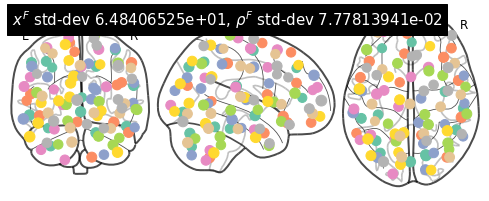

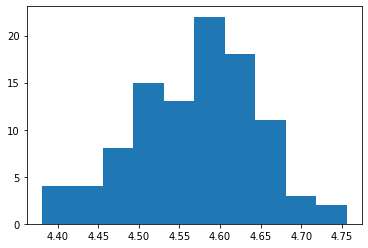

(<nilearn.plotting.displays.OrthoProjector at 0x7fa931b4f890>,
 tensor([[-3.3582e+01, -3.1607e+01, -2.3695e+01],
         [ 3.7021e+01, -7.1998e+00,  5.8695e+01],
         [ 4.8672e+01, -4.7610e+01, -2.1817e+01],
         [-3.5688e+01, -5.8933e+01,  4.6470e+01],
         [-2.9381e+01,  3.8304e+01,  4.0013e+01],
         [ 1.7863e+00,  4.4510e+01,  8.6604e+00],
         [ 4.7341e-01, -8.1176e+01, -6.5241e+00],
         [ 1.6863e+01, -7.4764e+01,  4.1345e+01],
         [-5.1211e+01, -3.5517e+01,  4.5279e+01],
         [ 5.6206e+01, -2.4784e+01,  2.1121e+01],
         [-5.3317e+01, -5.2111e+00, -9.9262e+00],
         [ 1.6529e+01, -7.3789e+01, -2.8623e+01],
         [-3.1160e+01, -7.1939e+01, -4.2654e+01],
         [ 3.5369e+01,  2.8732e+01, -1.7472e+01],
         [-1.0828e+01,  2.3845e+00,  6.6349e+01],
         [-5.8970e+00,  3.2651e+01,  5.6558e+01],
         [ 3.8802e+01, -7.6373e+01,  2.1681e+01],
         [ 4.3596e+01,  3.8372e+01,  2.4334e+01],
         [ 1.2175e+01, -5.3133e+01, -

In [8]:
dtfa.visualize_factor_embedding()

In [9]:
dtfa.num_blocks

552

In [10]:
losses = dtfa.train(num_steps=1000, learning_rate={'q': 1e-2, 'p': 1e-3}, log_level=logging.INFO, num_particles=1,
                    batch_size=50, use_cuda=True, checkpoint_steps=100, blocks_batch_size=10, patience=20,
                    blocks_filter=haxby_db.inference_filter(training=True))

05/31/2020 22:56:54 [Epoch 1] (7114ms) Posterior free-energy 9.67393485e+09 = KL from prior 1.57291120e+07 - log-likelihood -9.65820723e+09
05/31/2020 22:56:54 Saving checkpoint...
05/31/2020 22:57:01 [Epoch 2] (6911ms) Posterior free-energy 9.39778048e+09 = KL from prior 9.10442300e+06 - log-likelihood -9.38867507e+09
05/31/2020 22:57:07 [Epoch 3] (6784ms) Posterior free-energy 9.22525184e+09 = KL from prior 7.02899150e+06 - log-likelihood -9.21822106e+09
05/31/2020 22:57:14 [Epoch 4] (6797ms) Posterior free-energy 9.10970675e+09 = KL from prior 4.63340200e+06 - log-likelihood -9.10507315e+09
05/31/2020 22:57:21 [Epoch 5] (6813ms) Posterior free-energy 9.01591859e+09 = KL from prior 2.74321950e+06 - log-likelihood -9.01317325e+09
05/31/2020 22:57:28 [Epoch 6] (6812ms) Posterior free-energy 8.95679283e+09 = KL from prior 1.80559988e+06 - log-likelihood -8.95498854e+09
05/31/2020 22:57:35 [Epoch 7] (6822ms) Posterior free-energy 8.90655334e+09 = KL from prior 1.29981300e+06 - log-likeli

Epoch   419: reducing learning rate of group 0 to 5.0000e-03.
Epoch   419: reducing learning rate of group 1 to 5.0000e-04.
Epoch   419: reducing learning rate of group 2 to 5.0000e-03.
Epoch   419: reducing learning rate of group 3 to 5.0000e-04.


05/31/2020 23:44:45 [Epoch 420] (6826ms) Posterior free-energy 6.24008499e+09 = KL from prior 1.98128000e+06 - log-likelihood -6.23810509e+09
05/31/2020 23:44:52 [Epoch 421] (6808ms) Posterior free-energy 6.19598541e+09 = KL from prior 1.97762662e+06 - log-likelihood -6.19400858e+09
05/31/2020 23:44:59 [Epoch 422] (6801ms) Posterior free-energy 6.19349914e+09 = KL from prior 1.97800700e+06 - log-likelihood -6.19152128e+09
05/31/2020 23:45:06 [Epoch 423] (6821ms) Posterior free-energy 6.19274342e+09 = KL from prior 1.97896438e+06 - log-likelihood -6.19076557e+09
05/31/2020 23:45:13 [Epoch 424] (6806ms) Posterior free-energy 6.19204813e+09 = KL from prior 1.97713362e+06 - log-likelihood -6.19007130e+09
05/31/2020 23:45:19 [Epoch 425] (6807ms) Posterior free-energy 6.19136512e+09 = KL from prior 1.97879100e+06 - log-likelihood -6.18938726e+09
05/31/2020 23:45:26 [Epoch 426] (6823ms) Posterior free-energy 6.19075277e+09 = KL from prior 1.97799588e+06 - log-likelihood -6.18877696e+09
05/31/

Epoch   602: reducing learning rate of group 0 to 2.5000e-03.
Epoch   602: reducing learning rate of group 1 to 2.5000e-04.
Epoch   602: reducing learning rate of group 2 to 2.5000e-03.
Epoch   602: reducing learning rate of group 3 to 2.5000e-04.


06/01/2020 00:05:42 [Epoch 603] (6824ms) Posterior free-energy 6.16756070e+09 = KL from prior 2.01018112e+06 - log-likelihood -6.16554854e+09
06/01/2020 00:05:49 [Epoch 604] (6810ms) Posterior free-energy 6.16429875e+09 = KL from prior 2.01059500e+06 - log-likelihood -6.16228966e+09
06/01/2020 00:05:56 [Epoch 605] (6815ms) Posterior free-energy 6.16386304e+09 = KL from prior 2.01272812e+06 - log-likelihood -6.16185037e+09
06/01/2020 00:06:03 [Epoch 606] (6818ms) Posterior free-energy 6.16370739e+09 = KL from prior 2.01339125e+06 - log-likelihood -6.16169318e+09
06/01/2020 00:06:10 [Epoch 607] (6834ms) Posterior free-energy 6.16347597e+09 = KL from prior 2.01518450e+06 - log-likelihood -6.16146227e+09
06/01/2020 00:06:17 [Epoch 608] (6820ms) Posterior free-energy 6.16335155e+09 = KL from prior 2.02327000e+06 - log-likelihood -6.16132915e+09
06/01/2020 00:06:23 [Epoch 609] (6808ms) Posterior free-energy 6.16322253e+09 = KL from prior 2.02807888e+06 - log-likelihood -6.16119347e+09
06/01/

Epoch   988: reducing learning rate of group 0 to 1.2500e-03.
Epoch   988: reducing learning rate of group 1 to 1.2500e-04.
Epoch   988: reducing learning rate of group 2 to 1.2500e-03.
Epoch   988: reducing learning rate of group 3 to 1.2500e-04.


06/01/2020 00:49:40 [Epoch 989] (6954ms) Posterior free-energy 6.14735258e+09 = KL from prior 2.07943838e+06 - log-likelihood -6.14527181e+09
06/01/2020 00:49:47 [Epoch 990] (6863ms) Posterior free-energy 6.14709402e+09 = KL from prior 2.07101438e+06 - log-likelihood -6.14502400e+09
06/01/2020 00:49:53 [Epoch 991] (6819ms) Posterior free-energy 6.14698086e+09 = KL from prior 2.07009338e+06 - log-likelihood -6.14490931e+09
06/01/2020 00:50:00 [Epoch 992] (6830ms) Posterior free-energy 6.14684979e+09 = KL from prior 2.07001388e+06 - log-likelihood -6.14477978e+09
06/01/2020 00:50:07 [Epoch 993] (6820ms) Posterior free-energy 6.14682368e+09 = KL from prior 2.07223675e+06 - log-likelihood -6.14475110e+09
06/01/2020 00:50:14 [Epoch 994] (6825ms) Posterior free-energy 6.14682368e+09 = KL from prior 2.07171262e+06 - log-likelihood -6.14475110e+09
06/01/2020 00:50:21 [Epoch 995] (6814ms) Posterior free-energy 6.14673510e+09 = KL from prior 2.07258938e+06 - log-likelihood -6.14466253e+09
06/01/

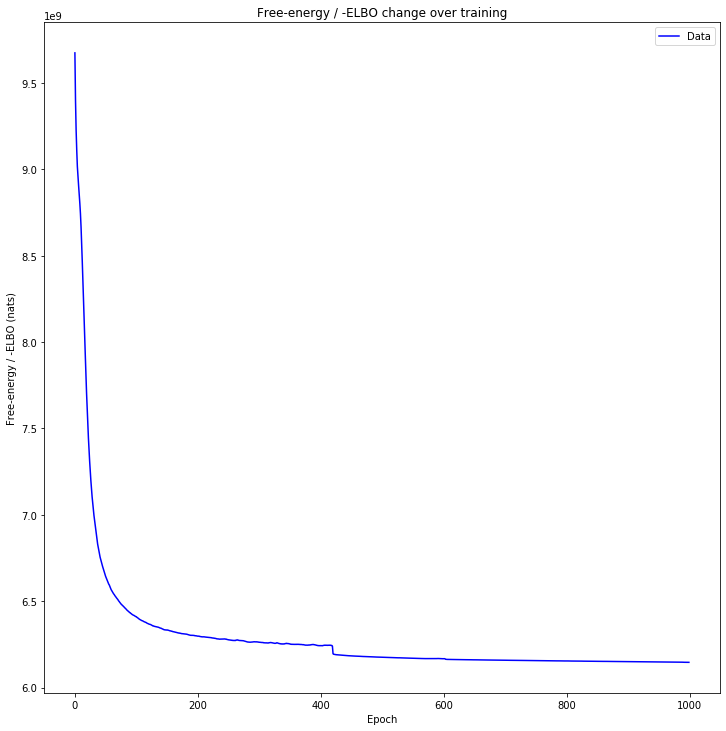

In [11]:
utils.plot_losses(losses)

In [12]:
losses = dtfa.train(num_steps=1000, learning_rate={'q': 1e-2, 'p': 1e-3}, log_level=logging.INFO, num_particles=1,
                    batch_size=50, use_cuda=True, checkpoint_steps=100, blocks_batch_size=10, patience=20,
                    blocks_filter=haxby_db.inference_filter(training=False))

06/01/2020 00:50:56 [Epoch 1] (809ms) Posterior free-energy 1.49222259e+09 = KL from prior 1.14698609e+05 - log-likelihood -1.49210790e+09
06/01/2020 00:50:56 Saving checkpoint...
06/01/2020 00:50:57 [Epoch 2] (821ms) Posterior free-energy 1.45347418e+09 = KL from prior 1.13518594e+05 - log-likelihood -1.45336064e+09
06/01/2020 00:50:58 [Epoch 3] (818ms) Posterior free-energy 1.41146458e+09 = KL from prior 1.05485062e+05 - log-likelihood -1.41135898e+09
06/01/2020 00:50:59 [Epoch 4] (820ms) Posterior free-energy 1.38134592e+09 = KL from prior 1.03611773e+05 - log-likelihood -1.38124211e+09
06/01/2020 00:50:59 [Epoch 5] (816ms) Posterior free-energy 1.35737242e+09 = KL from prior 1.01211523e+05 - log-likelihood -1.35727117e+09
06/01/2020 00:51:00 [Epoch 6] (812ms) Posterior free-energy 1.32138982e+09 = KL from prior 9.88809844e+04 - log-likelihood -1.32129101e+09
06/01/2020 00:51:01 [Epoch 7] (810ms) Posterior free-energy 1.29399706e+09 = KL from prior 9.84270391e+04 - log-likelihood -1

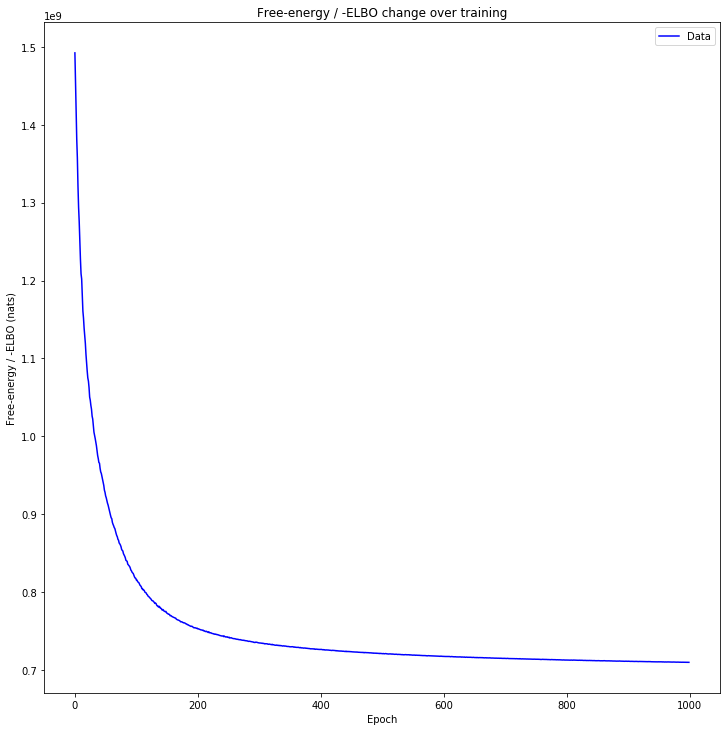

In [13]:
utils.plot_losses(losses)

In [14]:
def task_labeler(task):
    return task

def rest_task_labeler(task):
    if task == 'rest':
        return 'Rest'
    else:
        return 'Task'

/home/eli/AnacondaProjects/HTFATorch/htfa_torch/utils.py:156: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


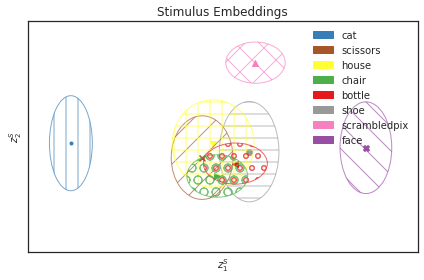

In [15]:
dtfa.scatter_task_embedding(labeler=task_labeler, figsize=None, colormap='Set1',
                            filename='haxby_norest_task_embedding.pdf')

In [16]:
def subject_labeler(subject):
    return 'Subject %d' % subject

/home/eli/AnacondaProjects/HTFATorch/htfa_torch/utils.py:156: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


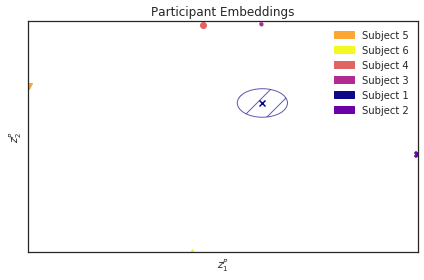

In [17]:
dtfa.scatter_subject_embedding(labeler=subject_labeler, figsize=None, colormap='plasma')

In [18]:
def block_task_labeler(b):
    task = b.task
    return task

06/01/2020 01:04:34 Plotting factors for Participant 2, run 7


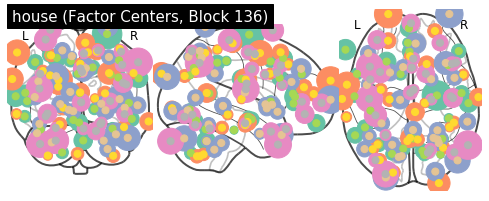

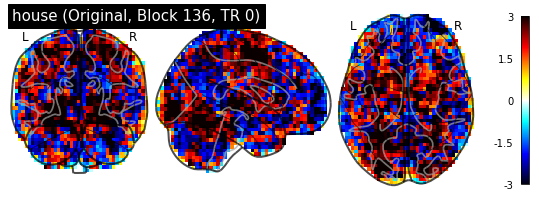

06/01/2020 01:04:36 Reconstruction Error (Frobenius Norm): 1.22306374e+02 out of 6.82859863e+02


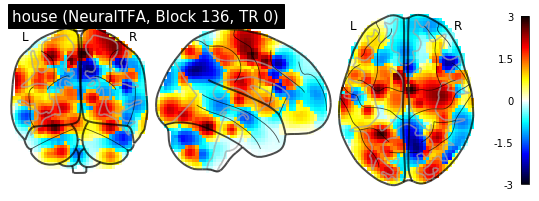

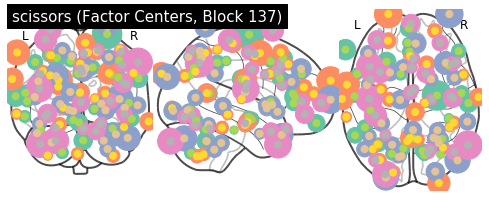

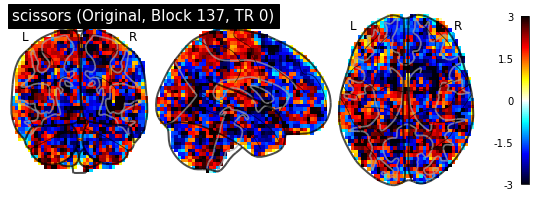

06/01/2020 01:04:39 Reconstruction Error (Frobenius Norm): 1.13463669e+02 out of 6.00198181e+02


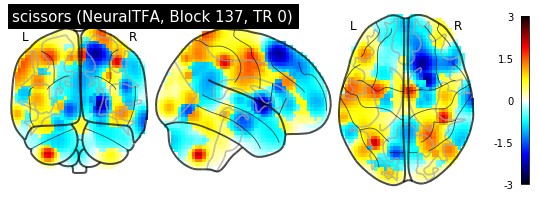

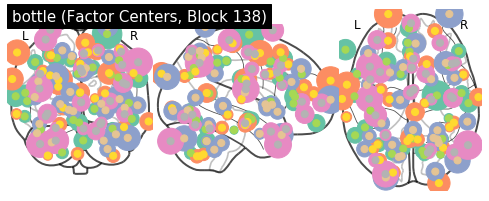

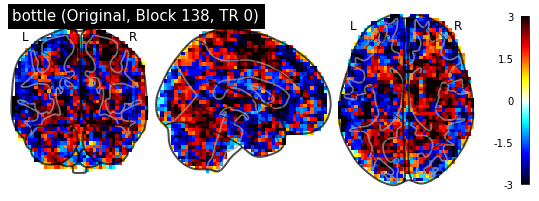

06/01/2020 01:04:42 Reconstruction Error (Frobenius Norm): 1.14599022e+02 out of 6.44000854e+02


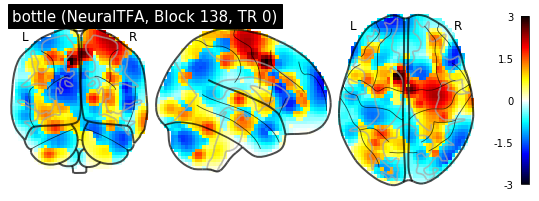

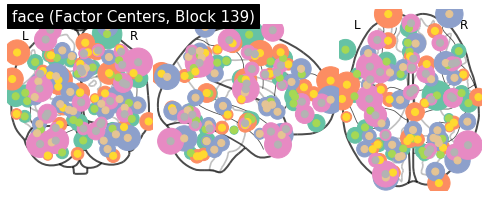

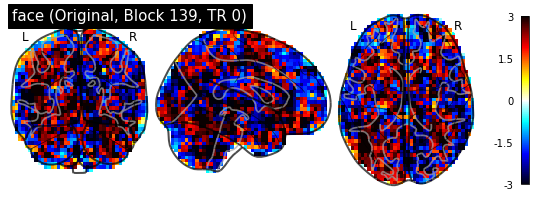

06/01/2020 01:04:45 Reconstruction Error (Frobenius Norm): 1.33877396e+02 out of 6.50583679e+02


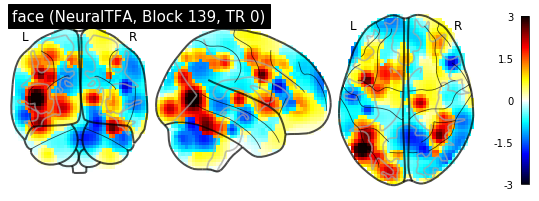

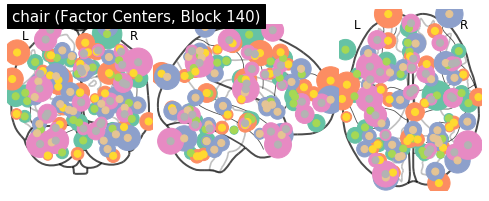

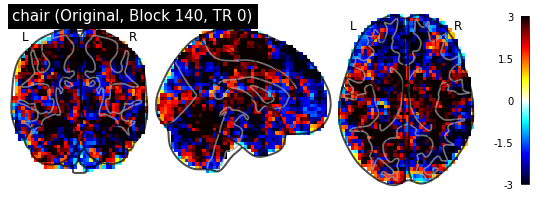

06/01/2020 01:04:48 Reconstruction Error (Frobenius Norm): 1.19789574e+02 out of 6.13922791e+02


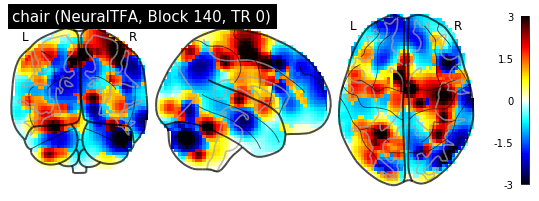

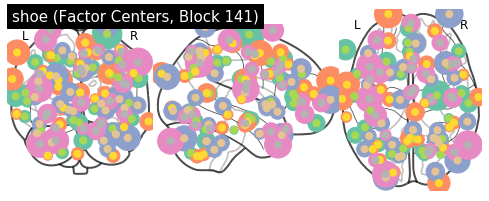

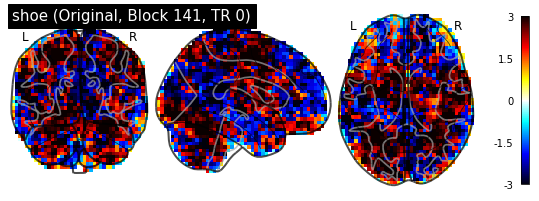

06/01/2020 01:04:51 Reconstruction Error (Frobenius Norm): 1.24796944e+02 out of 6.20156250e+02


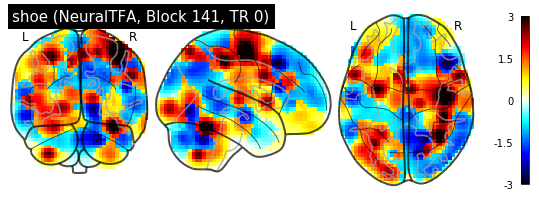

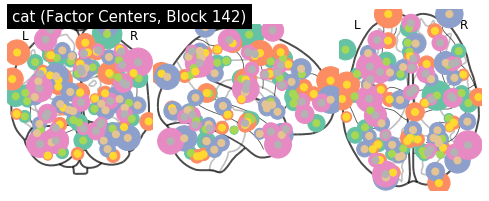

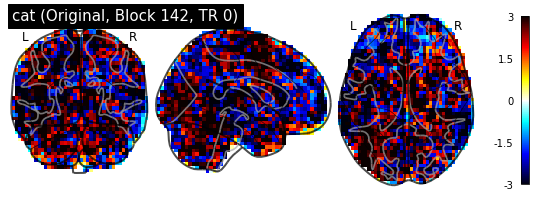

06/01/2020 01:04:53 Reconstruction Error (Frobenius Norm): 1.23547935e+02 out of 6.38475952e+02


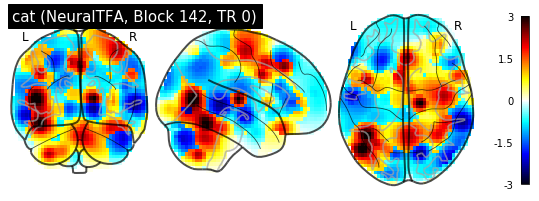

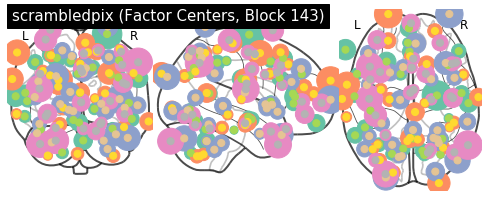

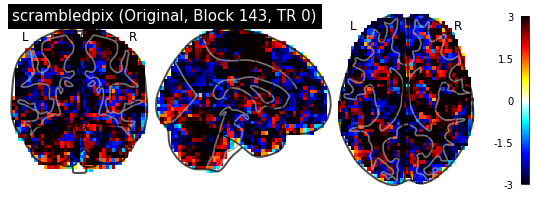

06/01/2020 01:04:56 Reconstruction Error (Frobenius Norm): 1.34319946e+02 out of 6.73383118e+02


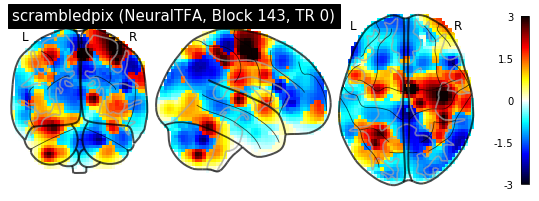

In [19]:
subject_runs = set([(block.subject, block.run) for block in dtfa._blocks])

for i in np.random.choice(range(len(subject_runs)), 1):
    subject, run = list(subject_runs)[i]
    logging.info('Plotting factors for Participant %d, run %d' % (subject, run))
    blocks = [block for block in dtfa._blocks if block.subject == subject and block.run == run]
    blocks.sort(key=lambda b: b.start_time)
    for block in blocks:
        index = dtfa._blocks.index(block)
        dtfa.plot_factor_centers(index, labeler=block_task_labeler)
        dtfa.plot_original_brain(index, labeler=block_task_labeler)
        dtfa.plot_reconstruction(index, labeler=block_task_labeler)

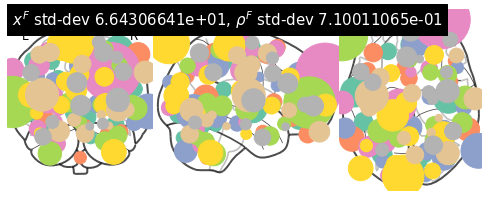

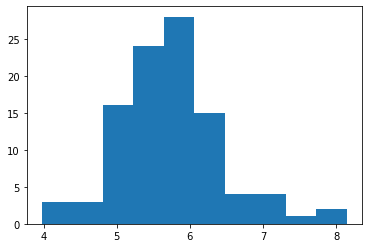

(<nilearn.plotting.displays.OrthoProjector at 0x7fa8da35ac10>,
 tensor([[-31.7910, -46.4671, -20.1647],
         [ 40.2623, -14.4759,  58.0266],
         [ 36.9384, -61.5736, -20.0977],
         [-29.9504, -58.7880,  46.2518],
         [-23.0961,  34.9833,  28.1213],
         [  3.4837,  41.7150, -11.3662],
         [ -6.0774, -85.8307,  -8.1244],
         [ 16.0720, -75.0553,  35.5441],
         [-48.7942, -38.8107,  46.7704],
         [ 57.2590, -38.2701,  17.4306],
         [-57.5282,  -7.9386,  -2.0064],
         [ 10.8127, -81.2618, -33.3361],
         [-29.2667, -73.3458, -40.5020],
         [ 30.5065,  50.2035, -29.6011],
         [ -1.0972,   6.7220,  53.9358],
         [ -5.5318,  18.3688,  62.0502],
         [ 31.8169, -76.8687,  31.7274],
         [ 46.5559,  24.8311,  26.9590],
         [  0.1625, -56.2789, -54.7600],
         [-61.0745, -57.0415,   9.1643],
         [ 43.0484,   2.9244, -27.3680],
         [-38.6501,  33.6459, -11.4854],
         [ 60.9922, -47.1080,  53.9

In [20]:
dtfa.visualize_factor_embedding()

In [21]:
dtfa.average_reconstruction_error(weighted=False,
                                  blocks_filter=haxby_db.inference_filter(training=True))

06/01/2020 01:05:08 Average reconstruction error (MSE): 5.23708507e+02 +/- 4.36215113e+01
06/01/2020 01:05:08 Average data norm (Euclidean): 6.03396824e+02 +/- 6.17218792e+01
06/01/2020 01:05:08 Percent average reconstruction error: 87.031249 +/- 3.85048355e+00


(array([559.3994751 , 532.90649414, 499.11972046, 506.81958008,
        526.13311768, 507.87384033, 512.51037598, 486.40374756,
        556.55419922, 527.81585693, 499.65899658, 448.84442139,
        470.58319092, 487.97451782, 547.42572021, 539.96429443,
        500.69268799, 497.17004395, 468.78240967, 499.51577759,
        477.82406616, 532.16992188, 499.89840698, 509.6178894 ,
        615.50195312, 548.39562988, 507.21411133, 531.63952637,
        476.59924316, 512.44006348, 514.09118652, 476.62994385,
        587.79681396, 525.20025635, 465.97238159, 492.59539795,
        529.79638672, 491.30014038, 505.42407227, 539.77752686,
        594.30664062, 498.30667114, 495.42306519, 520.06359863,
        525.18450928, 507.64205933, 542.890625  , 490.23583984,
        522.82110596, 534.35375977, 483.98513794, 455.1882019 ,
        507.06814575, 552.7868042 , 517.23071289, 547.92297363,
        452.99526978, 449.91134644, 466.62875366, 447.60882568,
        463.88040161, 465.32388306, 429.

In [22]:
dtfa.free_energy(batch_size=50, use_cuda=True, blocks_batch_size=10, num_particles=1, sample_size=100,
                 blocks_filter=haxby_db.inference_filter(training=False))

[[709853120.0, -709669376.0, 183817.34375],
 [710026368.0, -709515648.0, 184373.765625]]